In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as mccolors
from sklearn.model_selection import RandomizedSearchCV , train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
plt.style.use('seaborn')
%matplotlib inline
import math
import random
import time

In [40]:
import operator

In [41]:
#load dataset
confirm_data = pd.read_csv('time_series_covid_19_confirmed.csv') 

In [42]:
death_data = pd.read_csv('time_series_covid_19_deaths.csv')

In [43]:
recoverd_data = pd.read_csv('time_series_covid_19_recovered.csv')

In [44]:
confirm_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [45]:
death_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,19,22,22,27,29,29,29,33,35,40
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,2,2,2,3,4,10


In [46]:
recoverd_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,35,41,42,42,42,42,44
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,144,144,144,150,191,232,235
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,97,105,105,109,114,114,114,124,140,144
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,35,42,42,49,60,75,87,114,139


In [47]:
cols = confirm_data.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [48]:
confirmed = confirm_data.loc[:,cols[4]:cols[-1]]

In [49]:
deaths = death_data.loc[:,cols[4]:cols[-1]]

In [51]:
recovered = recoverd_data.loc[:,cols[4]:cols[-1]]

In [52]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,2,3,5,7,8,8,14,14,14,19,...,75,82,114,147,177,212,272,322,411,599
1,2,1,2,2,4,4,7,7,11,15,...,701,773,839,825,878,889,924,963,1007,1086
2,0,1,3,3,4,5,7,7,10,13,...,200,212,226,243,266,313,345,385,432,455
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,0,0,0,3,4,4,4,7,8,8,...,197,238,428,566,673,790,900,1030,1183,1306


In [53]:

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [15]:
confirmed_sum

335955

In [16]:
death_sum

14632

In [17]:
recovered_sum

97704

In [54]:
#covert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [19]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60]])

In [20]:
world_cases

array([[   555],
       [   653],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30817],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76823],
       [ 78579],
       [ 78965],
       [ 79568],
       [ 80413],
       [ 81395],
       [ 82754],
       [ 84120],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97882],
       [101784],
       [105821],
       [109795],
       [113561],
       [118592],
       [125865],
       [128343],
       [145193],
       [156094],
       [167446],
       [181527],
       [197142],
       [214910],
       [242708],
       [272166

In [77]:
#future forcasting for the next 10 days

days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [22]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70]])

In [99]:
#covert all integers into datetime for vizualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days = i)).strftime('%m/%d/%Y'))

In [87]:
# for visualization with latest data

latest_confirmed = confirm_data[dates[-1]]
latest_deaths = death_data[dates[-1]]
latest_recoveries = recoverd_data[dates[-1]]

In [88]:
#unique countries

unique_countries = list(confirm_data['Country/Region'].unique())

In [59]:
# calculate the total number of cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirm_data['Country/Region']==i].sum()
    if cases > 0 :
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k ,v in sorted(zip(unique_countries,country_confirmed_cases), key = operator.itemgetter(1), reverse=True)] 
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirm_data['Country/Region']==unique_countries[i]].sum(

In [89]:
#number of cases per country

print("Confirmed Cases by Country/Regions:")
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]} : {country_confirmed_cases[i]} cases')

Confirmed Cases by Country/Regions:
Thailand : 81397 cases
Japan : 59138 cases
Singapore : 33272 cases
Nepal : 28768 cases
Malaysia : 24873 cases
Canada : 21638 cases
Australia : 16176 cases
Cambodia : 8897 cases
Sri Lanka : 7245 cases
Germany : 5741 cases
Finland : 4216 cases
United Arab Emirates : 3401 cases
Philippines : 3244 cases
India : 2383 cases
Italy : 1934 cases
Sweden : 1600 cases
Spain : 1593 cases
Belgium : 1514 cases
Egypt : 1465 cases
Lebanon : 1314 cases
Iraq : 1306 cases
Oman : 1236 cases
Afghanistan : 1120 cases
Bahrain : 1086 cases
Kuwait : 1071 cases
Algeria : 906 cases
Croatia : 798 cases
Switzerland : 789 cases
Austria : 776 cases
Israel : 712 cases
Pakistan : 634 cases
Brazil : 632 cases
Georgia : 626 cases
Greece : 624 cases
North Macedonia : 599 cases
Norway : 568 cases
Romania : 514 cases
Estonia : 511 cases
San Marino : 494 cases
Belarus : 455 cases
Iceland : 433 cases
Lithuania : 414 cases
Mexico : 396 cases
New Zealand : 380 cases
Nigeria : 367 cases
Irelan

In [90]:
#find the list of unique provinces

unique_provinces = list(confirm_data['Province/State'].unique())
outliers = ['United Kingdom','Denmark','France']
for i in outliers:
    unique_provinces.remove(i)

In [91]:
# finding the number of confrimed cases per province,state or city

province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirm_data['Province/State'] == i ].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)

In [63]:
#number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}:{province_confirmed_cases[i]} cases')

British Columbia:424 cases
New South Wales:533 cases
Victoria:296 cases
Queensland:221 cases
South Australia:100 cases
Western Australia:120 cases
Tasmania:22 cases
Northern Territory:3 cases
Ontario:425 cases
Alberta:259 cases
Quebec:219 cases
Washington:1996 cases
New York:15793 cases
California:1642 cases
Massachusetts:646 cases
Diamond Princess:761 cases
Grand Princess:43 cases
Georgia:600 cases
Colorado:476 cases
Florida:830 cases
New Jersey:1914 cases
Oregon:161 cases
Texas:627 cases
Illinois:1049 cases
Pennsylvania:509 cases
Iowa:90 cases
Maryland:244 cases
North Carolina:302 cases
South Carolina:196 cases
Tennessee:505 cases
Virginia:221 cases
Arizona:152 cases
Indiana:201 cases
Kentucky:99 cases
District of Columbia:102 cases
Nevada:190 cases
New Hampshire:65 cases
Minnesota:169 cases
Nebraska:51 cases
Ohio:355 cases
Rhode Island:83 cases
Wisconsin:381 cases
Connecticut:223 cases
Hawaii:48 cases
Oklahoma:67 cases
Utah:181 cases
Kansas:64 cases
Louisiana:837 cases
Missouri:100 

In [92]:
#removing null values

nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
        
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

In [66]:
china_confirmed = latest_confirmed[confirm_data['Country/Region'] == 'China'].sum()
outside_minland_china_confirmed =np.sum(country_confirmed_cases) - china_confirmed

In [67]:
print('Outside Mainland China {} cases:'.format(outside_minland_china_confirmed))
print('Minland China {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed + outside_minland_china_confirmed))

Outside Mainland China 254558 cases:
Minland China 81397 cases
Total: 335955 cases


In [93]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False) 

In [94]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

C:\Users\Aadhil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 15585.352102340199
MSE: 289160260.1955434


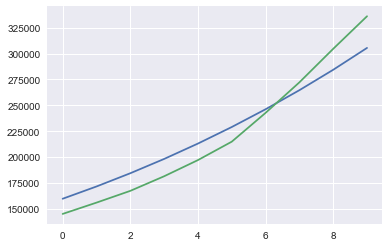

In [95]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

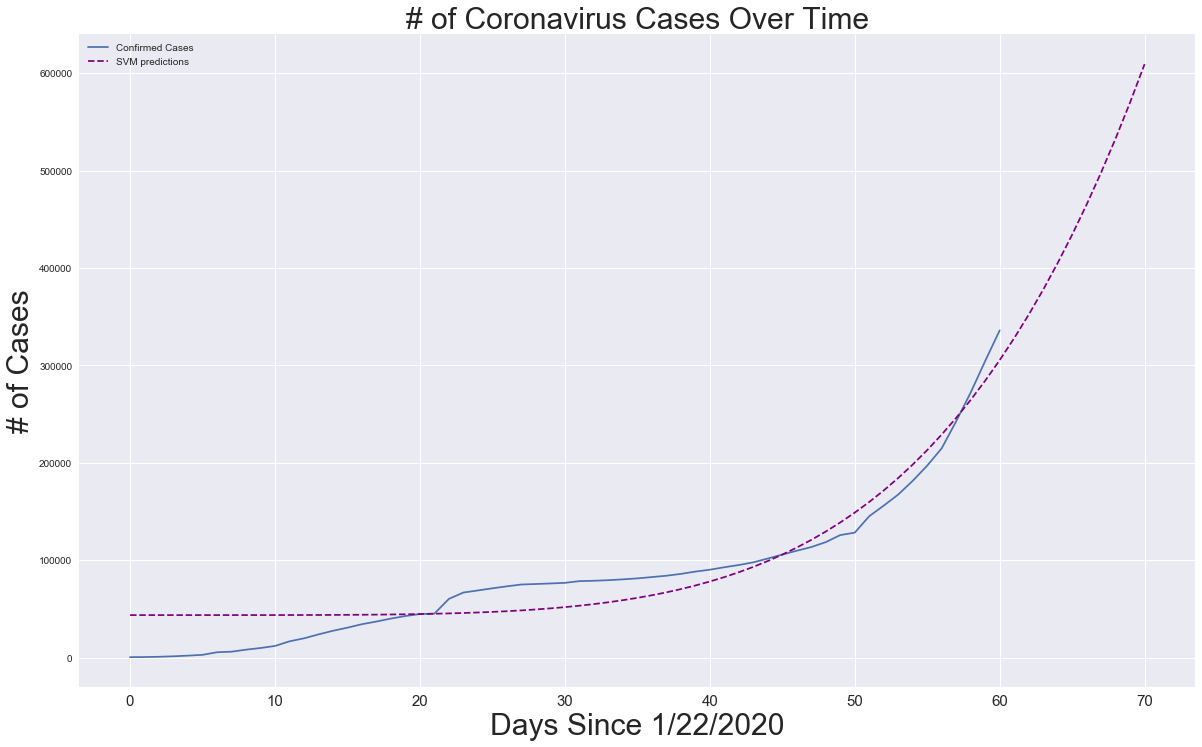

In [96]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.show()

In [100]:
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('03/23/2020', 327940.7707071298),
 ('03/24/2020', 352013.65649440076),
 ('03/25/2020', 377690.7545360679),
 ('03/26/2020', 405050.93982958124),
 ('03/27/2020', 434175.63140147814),
 ('03/28/2020', 465148.8326888115),
 ('03/29/2020', 498057.1719205713),
 ('03/30/2020', 532989.9424990832),
 ('03/31/2020', 570039.143381425),
 ('04/01/2020', 609299.5194608623)}